# Kaggle - WiDS Datathon 2022

# 1. Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


# 2. Data

In [2]:
#paths to the Github repo

train_path = 'https://raw.githubusercontent.com/ccollado7/wds-datathon-2022/main/data/raw/train.csv'
test_path = 'https://raw.githubusercontent.com/ccollado7/wds-datathon-2022/main/data/raw/test.csv'

In [3]:
#train dataset

train = pd.read_csv(train_path)
train.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4


In [4]:
#shape of train dataset

train.shape

(75757, 64)

In [5]:
#columns

train.columns

Index(['Year_Factor', 'State_Factor', 'building_class', 'facility_type',
       'floor_area', 'year_built', 'energy_star_rating', 'ELEVATION',
       'january_min_temp', 'january_avg_temp', 'january_max_temp',
       'february_min_temp', 'february_avg_temp', 'february_max_temp',
       'march_min_temp', 'march_avg_temp', 'march_max_temp', 'april_min_temp',
       'april_avg_temp', 'april_max_temp', 'may_min_temp', 'may_avg_temp',
       'may_max_temp', 'june_min_temp', 'june_avg_temp', 'june_max_temp',
       'july_min_temp', 'july_avg_temp', 'july_max_temp', 'august_min_temp',
       'august_avg_temp', 'august_max_temp', 'september_min_temp',
       'september_avg_temp', 'september_max_temp', 'october_min_temp',
       'october_avg_temp', 'october_max_temp', 'november_min_temp',
       'november_avg_temp', 'november_max_temp', 'december_min_temp',
       'december_avg_temp', 'december_max_temp', 'cooling_degree_days',
       'heating_degree_days', 'precipitation_inches', 'snowfall_inc

In [6]:
# data tyes - train

train.dtypes.value_counts()

int64      37
float64    24
object      3
dtype: int64

In [7]:
#test dataset

test = pd.read_csv(test_path)
test.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,id
0,7,State_1,Commercial,Grocery_store_or_food_market,28484.0,1994.0,37.0,2.4,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75757
1,7,State_1,Commercial,Grocery_store_or_food_market,21906.0,1961.0,55.0,45.7,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75758
2,7,State_1,Commercial,Grocery_store_or_food_market,16138.0,1950.0,1.0,59.1,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75759
3,7,State_1,Commercial,Grocery_store_or_food_market,97422.0,1971.0,34.0,35.4,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75760
4,7,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,35.0,1.8,38,50.596774,...,0,29,5,2,0,340.0,330.0,22.8,126.0,75761


In [8]:
#shape of test dataset

test.shape

(9705, 63)

In [9]:
# data tyes - test

test.dtypes.value_counts()

int64      37
float64    23
object      3
dtype: int64

# 3. Analysis - Train dataset

## 3.1 General EDA

In [11]:
#columns with null

null_count = train.isnull().sum()
null_count[null_count > 0]

year_built                    1837
energy_star_rating           26709
direction_max_wind_speed     41082
direction_peak_wind_speed    41811
max_wind_speed               41082
days_with_fog                45796
dtype: int64

### Year Factor

anonymized year in which the weather and energy usage factors were observed

Text(0.5, 1.0, 'Test')

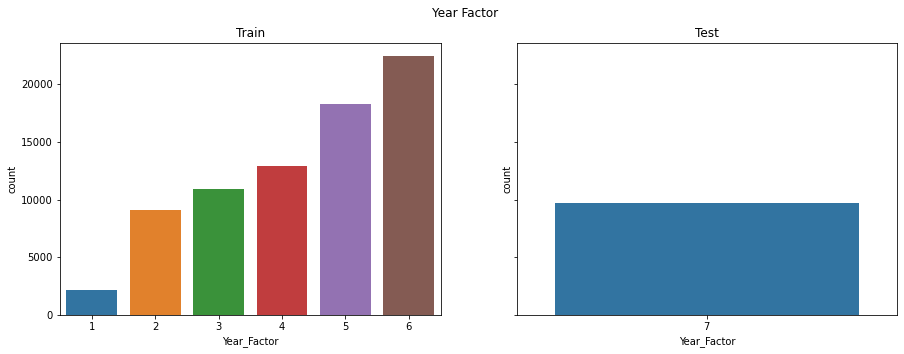

In [56]:
#count by year

fig, ax = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Year Factor')


sns.countplot(ax=ax[0],x="Year_Factor",data=train)
ax[0].set_title('Train')

sns.countplot(ax=ax[1],x="Year_Factor",data=test)
ax[1].set_title('Test')

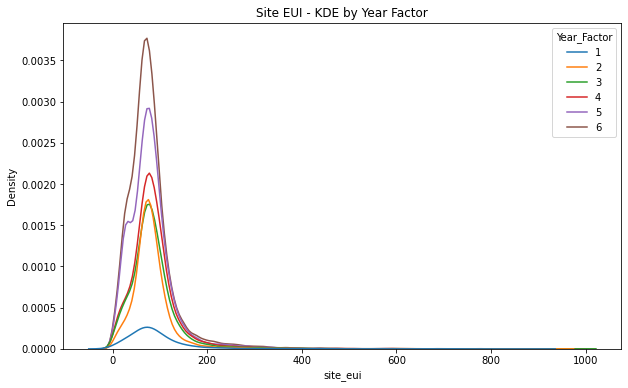

In [66]:
#Site EUI - KDE by Year Factor

fig = plt.figure(figsize=(10,6))
sns.kdeplot(x="site_eui",data=train,hue='Year_Factor',palette="tab10")
plt.title('Site EUI - KDE by Year Factor')
plt.show()

<AxesSubplot:xlabel='Year_Factor', ylabel='site_eui'>

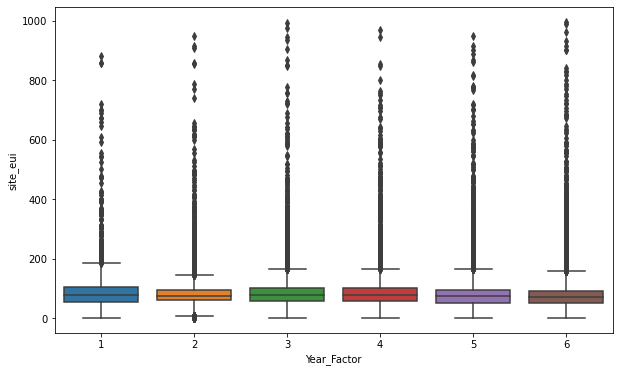

In [62]:
#Site EUI - Boxplot by Year Factor

fig = plt.figure(figsize=(10,6))
sns.boxplot(x="Year_Factor", y="site_eui", data=train)

### State Factor

anonymized state in which the building is located

Text(0.5, 1.0, 'Test')

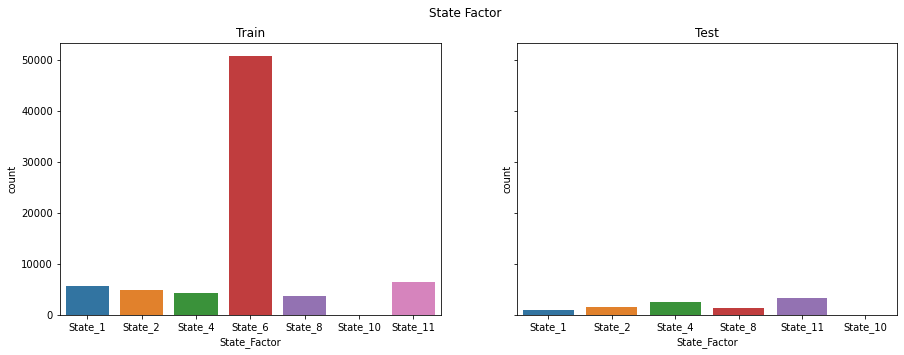

In [63]:
#count by state factor

fig, ax = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('State Factor')


sns.countplot(ax=ax[0],x="State_Factor",data=train)
ax[0].set_title('Train')

sns.countplot(ax=ax[1],x="State_Factor",data=test)
ax[1].set_title('Test')

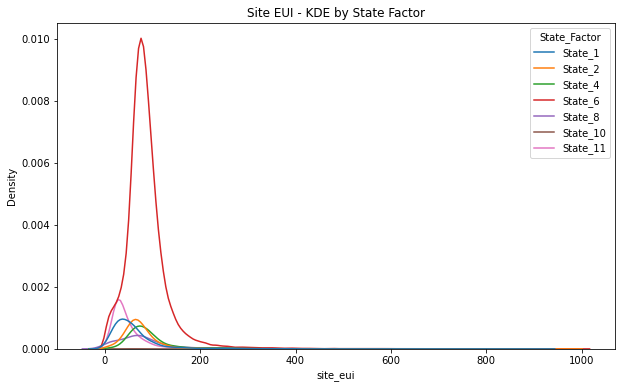

In [73]:
#Site EUI - KDE by State Factor

fig = plt.figure(figsize=(10,6))
sns.kdeplot(x="site_eui",data=train,hue='State_Factor',palette="tab10")
plt.title('Site EUI - KDE by State Factor')
plt.show()

<AxesSubplot:xlabel='State_Factor', ylabel='site_eui'>

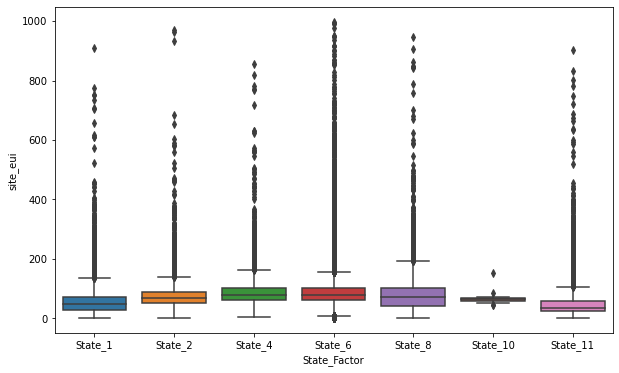

In [67]:
#Site EUI - Boxplot by State Factor

fig = plt.figure(figsize=(10,6))
sns.boxplot(x="State_Factor", y="site_eui", data=train)

### Building Class

building classification

Text(0.5, 1.0, 'Test')

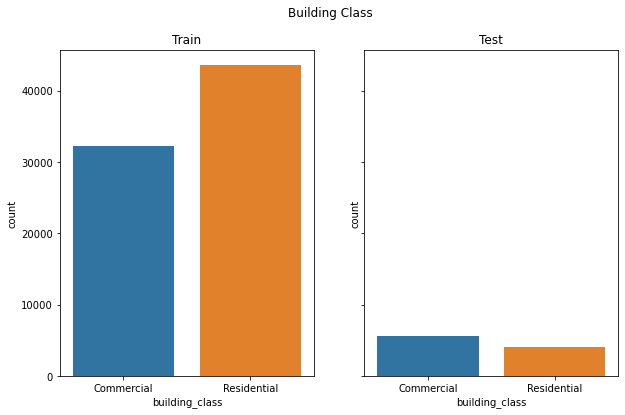

In [74]:
#count by building classification

fig, ax = plt.subplots(1, 2, figsize=(10, 6), sharey=True)
fig.suptitle('Building Class')


sns.countplot(ax=ax[0],x="building_class",data=train)
ax[0].set_title('Train')

sns.countplot(ax=ax[1],x="building_class",data=test)
ax[1].set_title('Test')

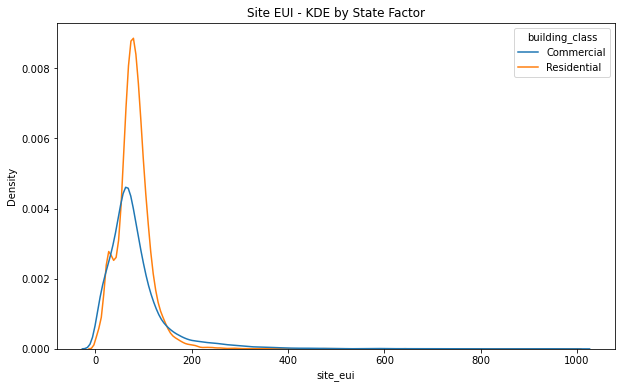

In [75]:
#Site EUI - KDE by building classification

fig = plt.figure(figsize=(10,6))
sns.kdeplot(x="site_eui",data=train,hue='building_class',palette="tab10")
plt.title('Site EUI - KDE by State Factor')
plt.show()

<AxesSubplot:xlabel='building_class', ylabel='site_eui'>

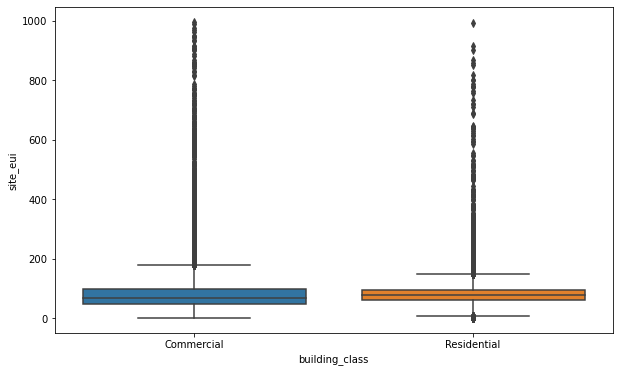

In [76]:
#Site EUI - Boxplot by building classification

fig = plt.figure(figsize=(10,6))
sns.boxplot(x="building_class", y="site_eui", data=train)

### Facility Type

building usage type

In [82]:
train['facility_type'].unique()

array(['Grocery_store_or_food_market',
       'Warehouse_Distribution_or_Shipping_center',
       'Retail_Enclosed_mall', 'Education_Other_classroom',
       'Warehouse_Nonrefrigerated', 'Warehouse_Selfstorage',
       'Office_Uncategorized', 'Data_Center', 'Commercial_Other',
       'Mixed_Use_Predominantly_Commercial',
       'Office_Medical_non_diagnostic', 'Education_College_or_university',
       'Industrial', 'Laboratory',
       'Public_Assembly_Entertainment_culture',
       'Retail_Vehicle_dealership_showroom', 'Retail_Uncategorized',
       'Lodging_Hotel', 'Retail_Strip_shopping_mall',
       'Education_Uncategorized', 'Health_Care_Inpatient',
       'Public_Assembly_Drama_theater', 'Public_Assembly_Social_meeting',
       'Religious_worship', 'Mixed_Use_Commercial_and_Residential',
       'Office_Bank_or_other_financial', 'Parking_Garage',
       'Commercial_Unknown', 'Service_Vehicle_service_repair_shop',
       'Service_Drycleaning_or_Laundry', 'Public_Assembly_Recreation

Text(0.5, 1.0, 'Train')

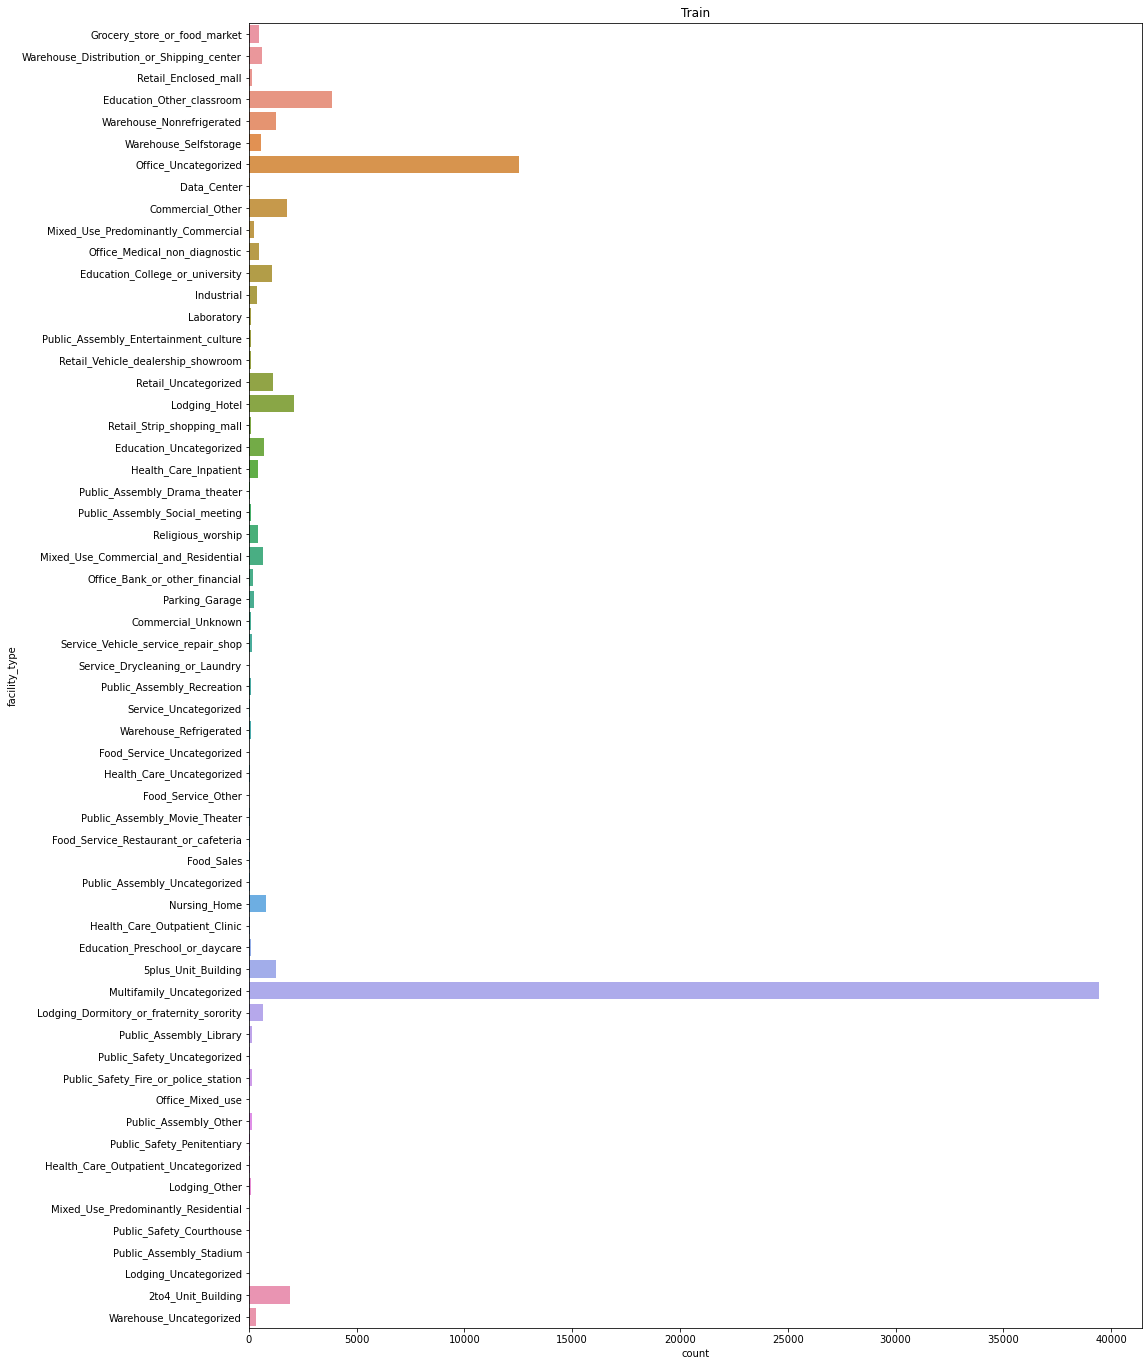

In [91]:
plt.figure(figsize=(16,24))
sns.countplot(y="facility_type",data=train)
plt.title('Train')

Text(0.5, 1.0, 'Test')

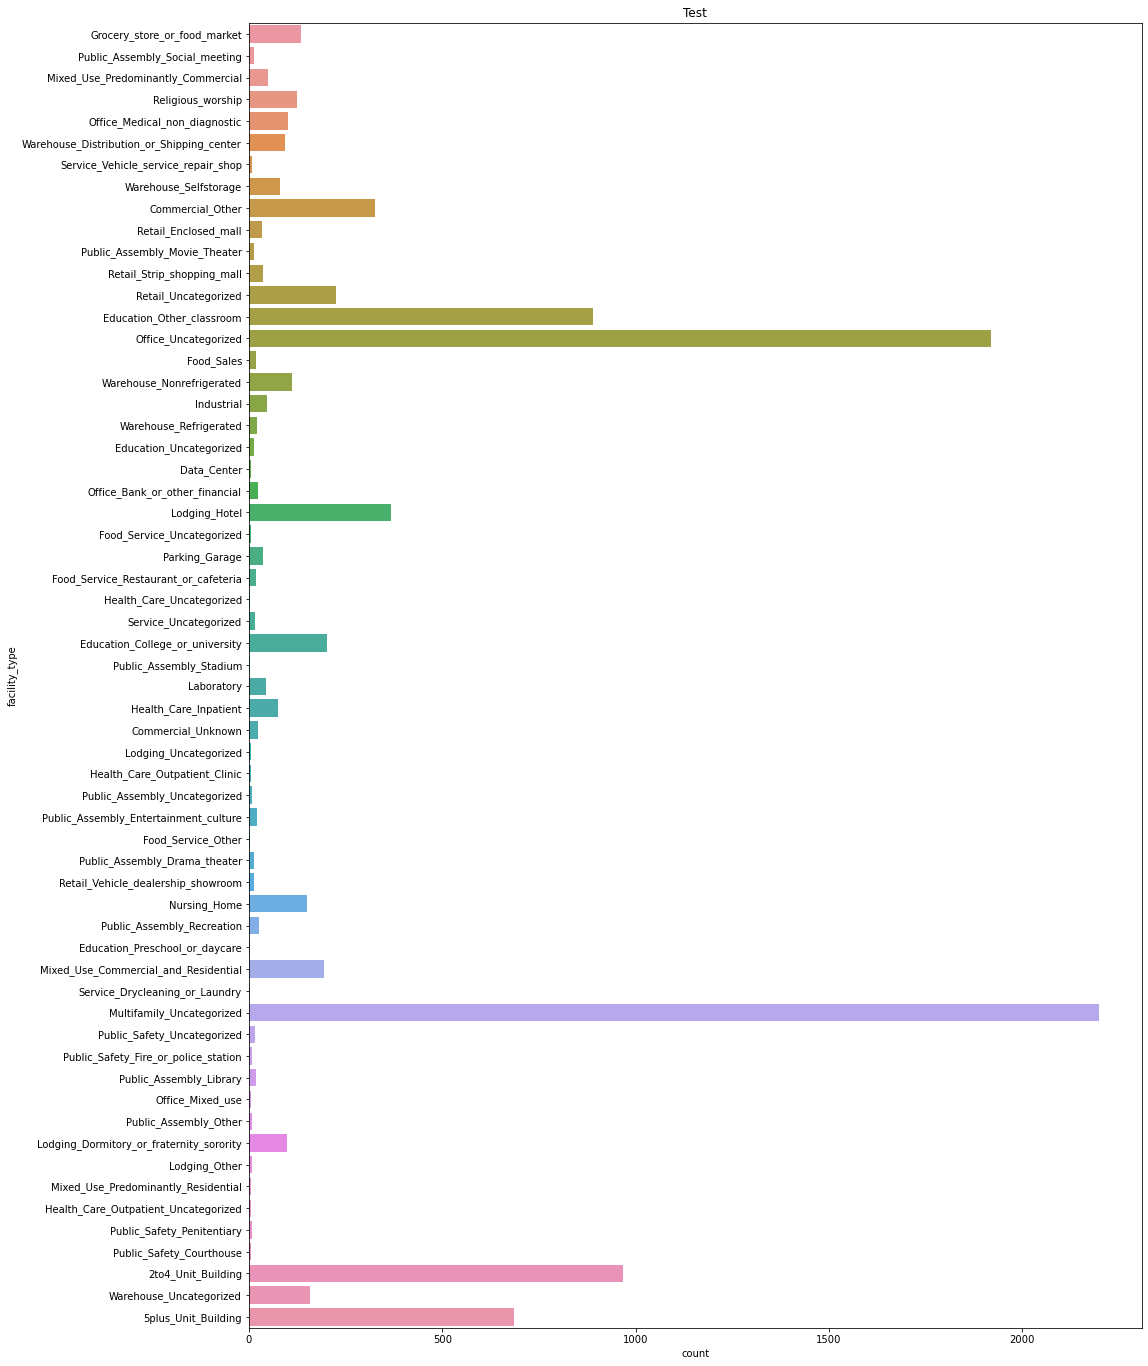

In [93]:
plt.figure(figsize=(16,24))
sns.countplot(y="facility_type",data=test)
plt.title('Test')

### Floor Area

floor area (in square feet) of the building

In [54]:
#statistics

train['floor_area'].describe()

count    7.575700e+04
mean     1.659839e+05
std      2.468758e+05
min      9.430000e+02
25%      6.237900e+04
50%      9.136700e+04
75%      1.660000e+05
max      6.385382e+06
Name: floor_area, dtype: float64

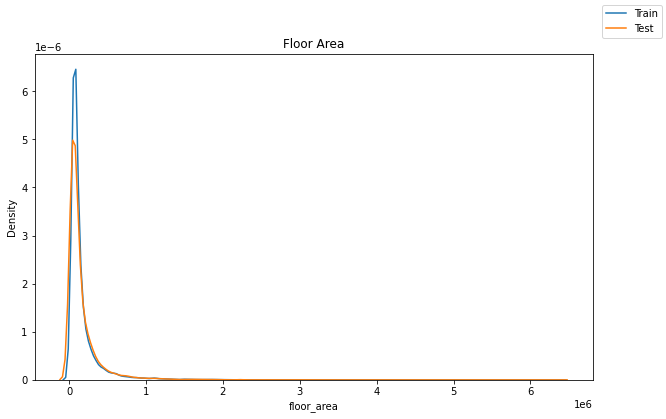

In [94]:
#kde plot

fig = plt.figure(figsize=(10,6))
sns.kdeplot(x="floor_area",data=train)
sns.kdeplot(x="floor_area",data=test)
fig.legend(labels=['Train','Test'])
plt.title('Floor Area')
plt.show()

<AxesSubplot:xlabel='floor_area', ylabel='site_eui'>

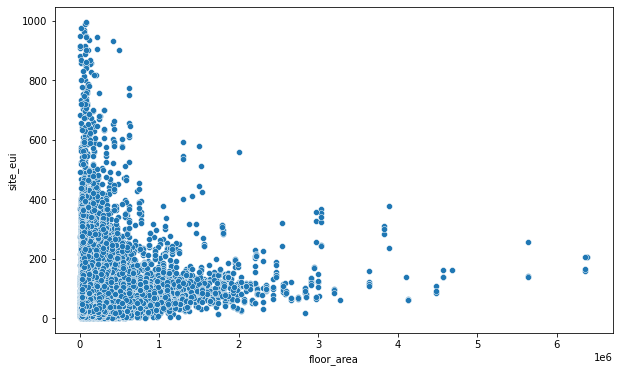

In [97]:
#scatter plot

fig = plt.figure(figsize=(10,6))
sns.scatterplot(data=train, x="floor_area", y="site_eui")

### Year Built

In [50]:
#statistics

train['year_built'].describe()

count    73920.000000
mean      1952.306764
std         37.053619
min          0.000000
25%       1927.000000
50%       1951.000000
75%       1977.000000
max       2015.000000
Name: year_built, dtype: float64

In [51]:
#rows with year_built cero value - train

train[train['year_built'] == 0]

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
353,1,State_1,Commercial,Lodging_Hotel,204392.0,0.0,61.0,59.1,36,50.500000,...,14,0,0,0,NaN,NaN,NaN,NaN,82.627179,353
955,2,State_1,Commercial,Lodging_Hotel,204392.0,0.0,63.0,2.4,27,48.951613,...,113,35,1,0,1.0,1.0,1.0,88.0,87.526794,955
2159,3,State_1,Commercial,Lodging_Hotel,204392.0,0.0,63.0,9.1,22,44.790323,...,72,10,0,0,NaN,NaN,NaN,NaN,75.362740,2159
3415,4,State_1,Commercial,Lodging_Hotel,204392.0,0.0,68.0,9.1,41,55.096774,...,27,6,0,0,NaN,NaN,NaN,NaN,61.793699,3415
4535,5,State_1,Commercial,Lodging_Hotel,204392.0,0.0,76.0,9.1,29,51.387097,...,136,52,10,0,NaN,NaN,NaN,NaN,59.503653,4535
5571,6,State_1,Commercial,Lodging_Hotel,204392.0,0.0,78.0,45.7,37,52.693548,...,16,2,0,0,NaN,NaN,NaN,NaN,60.833333,5571


In [53]:
#rows with year_built cero value - test

test[test['year_built'] == 0]

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,id
7050,7,State_1,Commercial,Lodging_Hotel,204392.0,0.0,78.0,18.6,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,82807


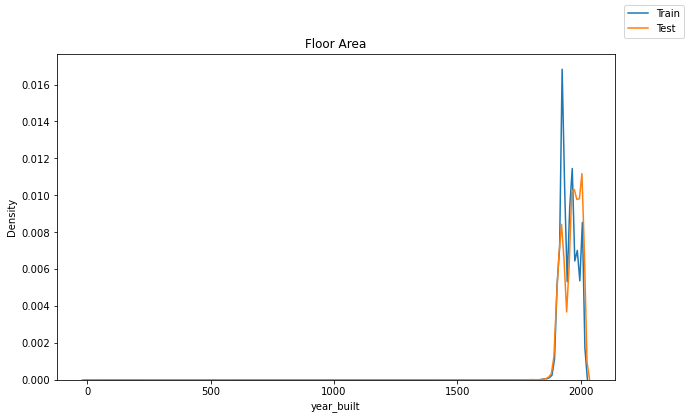

In [42]:
fig = plt.figure(figsize=(10,6))
sns.kdeplot(x="year_built",data=train_numeric)
sns.kdeplot(x="year_built",data=test_numeric)
fig.legend(labels=['Train','Test'])
plt.title('Floor Area')
plt.show()

Text(0.5, 1.0, 'Test')

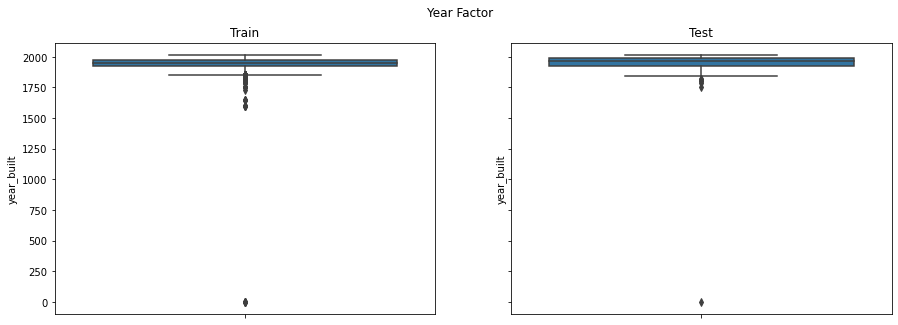

In [45]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Year Factor')


sns.boxplot(ax=ax[0],y="year_built",data=train_numeric)
ax[0].set_title('Train')

sns.boxplot(ax=ax[1],y="year_built",data=test_numeric)
ax[1].set_title('Test')

In [52]:
test[test['year_built'] == 0]

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,id
7050,7,State_1,Commercial,Lodging_Hotel,204392.0,0.0,78.0,18.6,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,82807


In [14]:
#Number of records per country

sns.countplot(x="country", data=train).set_title('Records per country')

ValueError: Could not interpret input 'country'

In [ ]:
#Number of records per store

sns.countplot(x="store", data=train).set_title('Records per store')

In [ ]:
#Number of records per product

sns.countplot(x="product", data=train).set_title('Records per product')

In [ ]:
#distribution of number of sales depending on the country

plt.figure(figsize=(12,8))
sns.kdeplot(data=train, x="num_sold", hue="country").set_title('KDE solds per country')

In [ ]:
#distribution of number of sales depending on the store

plt.figure(figsize=(12,8))
sns.kdeplot(data=train, x="num_sold", hue="store").set_title('KDE solds per store')

In [ ]:
#distribution of number of sales depending on the product

plt.figure(figsize=(12,8))
sns.kdeplot(data=train, x="num_sold", hue="product").set_title('KDE solds per product')

In [ ]:
# Total sales by day

plt.figure(figsize=(14,8))
sns.lineplot(data=train.groupby(['date']).sum(), x="date", y="num_sold").set_title('Total sales by day')

In [ ]:
#Quantity sold by country depending on the day of the year

plt.figure(figsize=(14,8))
sns.lineplot(data=train, x="date", y="num_sold",hue="country").set_title('Sales according to the day of the year and the country')

In [ ]:
#Quantity sold per store depending on the day of the year

plt.figure(figsize=(14,8))
sns.lineplot(data=train, x="day_year", y="num_sold",hue="store").set_title('Sales according to the day of the year and the store')

In [ ]:
#Quantity sold by type of product depending on the day of the year

plt.figure(figsize=(14,8))
sns.lineplot(data=train, x="day_year", y="num_sold",hue="product").set_title('Sold by type of product depending on the day of the year')

In [ ]:
#Quantity sold per country

sns.catplot(x="country", y="num_sold", kind="box", data=train,height=8, aspect=1)
plt.title('Boxplot - Sold per country')

In [ ]:
#Quantity sold per country and per year

sns.catplot(x="country", y="num_sold", hue="year", kind="box", data=train,height=10, aspect=1)
plt.title('Boxplot - Sold per country and per year')

In [ ]:
#Quantity sold by country and by store

sns.catplot(x="country", y="num_sold", hue="store", kind="box", data=train,height=10, aspect=1)
plt.title('Boxplot - Sold by country and by store')

In [ ]:
#Quantity sold per store and per year

sns.catplot(x="store", y="num_sold", hue="year", kind="box", data=train,height=10, aspect=1)
plt.title('Boxplot - Sold per store and per year')

In [ ]:
#Quantity sold by country and by product

sns.catplot(x="country", y="num_sold", hue="product", kind="box", data=train,height=10, aspect=1)
plt.title('Boxplot - Sold by country and by product')

In [ ]:
#Quantity sold per product and per year

sns.catplot(x="product", y="num_sold", hue="year", kind="box", data=train,height=10, aspect=1)
plt.title('Boxplot - Sold per product and per year')

In [ ]:
#Quantity sold per store and per product

sns.catplot(x="store", y="num_sold", hue="product", kind="box", data=train,height=10, aspect=1)
plt.title('Boxplot - Sold per store and per product')

## 3.2  Country Analysis

In [ ]:
#train - Finland

train_finland = train[train['country'] == 'Finland']
train_finland.head()

In [ ]:
#train - Norway

train_norway = train[train['country'] == 'Norway']
train_norway.head()

In [ ]:
#train - Sweden

train_sweden = train[train['country'] == 'Sweden']
train_sweden.head()

In [ ]:
countrys = train['country'].unique()

### Solds by year

In [ ]:
for i in countrys:
    plt.figure(figsize=(12,8))
    sns.kdeplot(data=train[train['country'] == i], x="num_sold", hue="year",palette="tab10").set_title(' KDE - Solds by year - ' + i)

###  Sold by Months

In [ ]:
for i in countrys:
    sns.catplot(x="month", y="num_sold", kind="box", data=train[train['country'] == i],height=8,aspect=1)
    plt.title('Boxplot - Sold by month - ' + i)

###  Sold by Months and store

In [ ]:
#Cantidad vendida por mes y tienda

for i in countrys:
    sns.catplot(x="month", y="num_sold",hue="store",kind="box", data=train[train['country'] == i],height=10,aspect=1)
    plt.title('Boxplot - Sold by month and store - ' + i)

###  Sold by week of the year

In [ ]:
#Cantidad vendida por semana

for i in countrys:
    sns.catplot(x="week", y="num_sold", kind="box", data=train[train['country'] == i],height=12, aspect=1)
    plt.title('Boxplot - Sold by week - ' + i)

###  Sold by day of the week

In [ ]:
#Cantidad vendida por dia del mes

for i in countrys:
    sns.catplot(x="day_month", y="num_sold", kind="box", data=train[train['country'] == i],height=10, aspect=1)
    plt.title('Boxplot - Sold by day of the month - ' + i)

### Sales by store depending on the day of the year and store

In [ ]:
for i in countrys:
    plt.figure(figsize=(14,8))
    sns.lineplot(data=train[train['country'] == i], x="day_year", y="num_sold",hue="store").set_title('Sales according to the day of the year and store - ' + i)

### Sales by store depending on the day of the year and product

In [ ]:
for i in countrys:
    plt.figure(figsize=(14,8))
    sns.lineplot(data=train[train['country'] == i], x="day_year", y="num_sold",hue="product").set_title('Sales according to the day of the year and product - ' + i)

## Pivot Tables

In [ ]:
train_date = train.set_index('date').pivot(columns=['country', 'store', 'product'], values='num_sold')
train_date.head()

In [ ]:
countrys = train['country'].unique()
stores = train['store'].unique()
products = train['product'].unique()

In [ ]:
for i in countrys:
    for j in stores:
        plt.figure(figsize=(14,8))
        sub_train = train[(train['country'] == i) & (train['store'] == j)]
        sns.lineplot(data=sub_train, x="date", y="num_sold",hue="product").set_title('Sales according to the day of the year and product - ' + i + ' - '+ j)